In [35]:
"""
 Basic imgae load, plot, resize, etc..
 Sungjoon Choi (sungjoon.choi@cpslab.snu.ac.kr)
"""
# Import packs
import numpy as np
import os
from PIL import Image
# scipy imread error 발생으로 matplotllib 사용 cv2는 rgb 순서가 bgr로 되어있어서 편의상 사용하지 않았음
from matplotlib.pyplot import imread
from scipy import misc
import imageio
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
import watermark
from PIL import Image
# import tensorflow as tf

%matplotlib inline  

print ("Packs loaded")

Packs loaded


In [16]:
# 버전확인
%load_ext version_information

In [18]:
%version_information numpy,scipy,matplotlib

Software versions
Python 3.7.4 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.8.0
OS Windows 7 6.1.7601 SP1
numpy 1.16.5
scipy 1.2.1
matplotlib 3.1.1
Fri Oct 04 05:53:17 2019 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [20]:
# scipy 1.3 버전이 아니라 1.21 버전을 사용하면 이미지 처리 메소드를 사용할수 있음
dir(misc)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_comb',
 '_fact',
 '_fact2',
 '_factk',
 '_info',
 '_lsm',
 '_msg',
 '_pade',
 '_source',
 '_who',
 'absolute_import',
 'ascent',
 'bytescale',
 'central_diff_weights',
 'comb',
 'derivative',
 'division',
 'doccer',
 'electrocardiogram',
 'face',
 'factorial',
 'factorial2',
 'factorialk',
 'fromimage',
 'imfilter',
 'imread',
 'imresize',
 'imrotate',
 'imsave',
 'imshow',
 'info',
 'logsumexp',
 'np',
 'pade',
 'print_function',
 'source',
 'test',
 'toimage',
 'who']

In [22]:
# Print Current Folder 
# 현재경로 지정
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) ) 

# Useful function
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

Current folder is C:\Users\user\edwith-ai


# Load & plot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


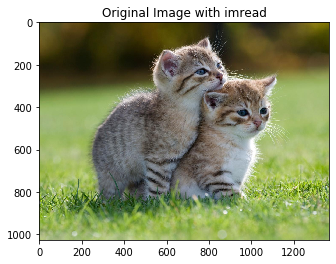

In [40]:
# Load 
# mapplotlib은 기본적능로 arrat로 불러옴
cat = misc.imread(cwd + "/images/cat.jpg")
print_typeshape(cat)
# Plot
plt.figure(0)
plt.imshow(cat)
plt.title("Original Image with imread")
plt.draw()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


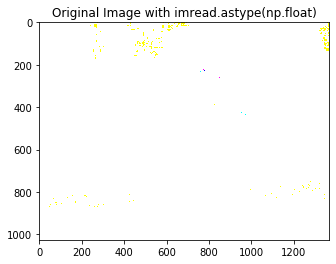

In [24]:
# Load
# 타입을 정할수도 있다.
cat2 = imread(cwd + "/images/cat.jpg").astype(np.float)
# 이미지는 기본적으로 0~255의 사이의 값을 가진다 
# 그러므로 float타입으로 불러오면 이미지가 이상하게 불러와진다.
print_typeshape(cat2)
# Plot
plt.figure(0)
plt.imshow(cat2)
plt.title("Original Image with imread.astype(np.float)")
plt.draw()

Type is <class 'numpy.ndarray'>
Shape is (1026, 1368, 3)


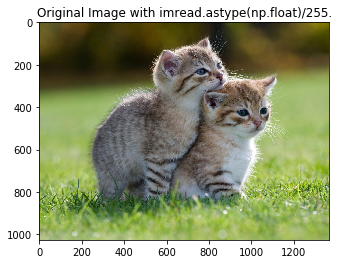

In [25]:
# Load
cat3 = imread(cwd + "/images/cat.jpg").astype(np.float)
print_typeshape(cat3)
# Plot
plt.figure(0)
# 255.으로 나누워서 불러왔다.
plt.imshow(cat3/255.)
plt.title("Original Image with imread.astype(np.float)/255.")
plt.draw()

# Resize

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


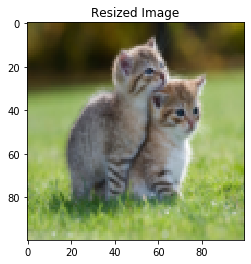

In [43]:
# RESIZE
catsmall = misc.imresize(cat, [100, 100])
print_typeshape(catsmall)
# PLOT
plt.figure(1)
plt.imshow(catsmall)
plt.title("Resized Image")
plt.draw()

# Grayscale

size of catsmallgray is (100, 100)
type of catsmallgray is <class 'numpy.ndarray'>


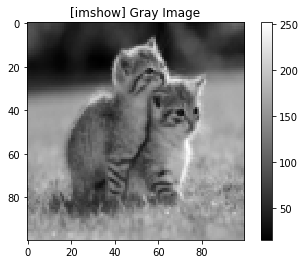

In [44]:
# Grayscale
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        #[:,:,3] 
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb
catsmallgray = rgb2gray(catsmall)

print ("size of catsmallgray is %s" % (catsmallgray.shape,))
print ("type of catsmallgray is", type(catsmallgray))

plt.figure(2)
plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

# Reshape

In [8]:
# Convert to Vector
catrowvec = np.reshape(catsmallgray, (1, -1));
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

# Convert to Matrix
catmatrix = np.reshape(catrowvec, (100, 100));
print ("size of catmatrix is %s" % (catmatrix.shape,))
print ("type of catmatrix is", type(catmatrix))

size of catrowvec is (1, 10000)
('type of catrowvec is', <type 'numpy.ndarray'>)
size of catmatrix is (100, 100)
('type of catmatrix is', <type 'numpy.ndarray'>)


# Load from folder

In [49]:
# Load from Folder
cwd  = os.getcwd()
path = cwd + "/images/cats"
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]

# print ("Images in %s are: \n %s" % (path, os.listdir(path)))
print ("%d files in %s" % (len(os.listdir(path)), path))

# Append Images and their Names to Lists
imgs = []
names = []
for f in os.listdir(path):
    # For all files 
    ext = os.path.splitext(f)[1]
    # Check types 
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path,f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0]+os.path.splitext(f)[1])
print ("%d images loaded" % (len(imgs))) 

38 files in C:\Users\user\edwith-ai/images/cats
38 images loaded


In [51]:
# Check
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx]
           , range(len(randidx))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name is: %s" % (curr_name))
    print ("    Size of 'curr_img': %s" % (curr_img.shape,))    

Type of 'imgs':  <class 'list'>
Length of 'imgs':  38
[0] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (12).jpeg
    Size of 'curr_img': (201, 251, 3)
[1] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (17).jpeg
    Size of 'curr_img': (275, 183, 3)
[2] Type of 'curr_img': <class 'numpy.ndarray'>
    Name is: images (21).jpeg
    Size of 'curr_img': (177, 284, 3)


In [56]:
len(imgs)

38

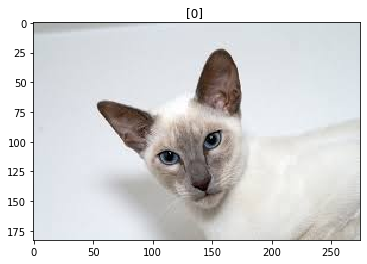

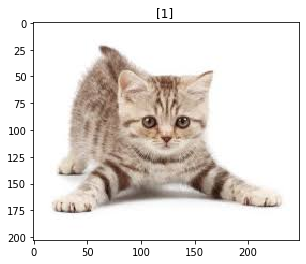

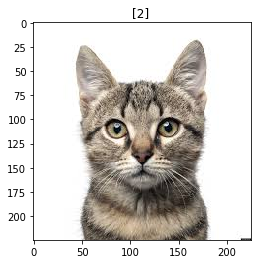

In [58]:
# Plot Images in 'imgs' list
nimgs = len(imgs)
randidx = np.sort(np.random.randint(nimgs, size=3))
for curr_img, curr_name, i \
    in zip([imgs[j] for j in randidx]
           , [names[j] for j in randidx], range(len(randidx))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "] ")
    plt.draw() 

In [12]:
print "That was all!"

That was all!
